![Image](../images/main.jpg)

## Chapter 13. 시계열 데이터

### 13.1. 시계열 데이터 소개

#### 13.1.1. 시계열 데이터의 종류

#### 13.1.2. datetime 자료형

#### 13.1.3. 시계열 데이터의 학습 주안점

### 13.2. 시계열 데이터로 변환 및 인덱싱

#### 13.2.1. 시계열 데이터로 변환하기(to_datetime)

In [93]:
# 코드 13-1. to_datetime 함수 실습 예제 코드
import pandas as pd
data = ['2023-01-01', '2023-02-02', '2023-03-02', '2023-04-10', '2023-05-31']
s = pd.Series(data)
s1 = pd.Series(['2022-01-03', '김판다'])
s

,0
0,2023-01-01
1,2023-02-02
2,2023-03-02
3,2023-04-10
4,2023-05-31


In [94]:
# 코드 13-2. to_datetime 함수로 datetime 자료형으로 변환하기
pd.to_datetime(s)

,0
0,2023-01-01
1,2023-02-02
2,2023-03-02
3,2023-04-10
4,2023-05-31


In [95]:
# 코드 13-3. errors='coerce'로 datetime 자료형으로 변환하기
print(s1, '\n') # s1과 빈 행을 출력하는 코드
pd.to_datetime(s1, errors='coerce')

0    2022-01-03
1           김판다
dtype: object 



,0
0,2022-01-03
1,NaT


#### 13.2.2. 기타 시계열 변환 함수

In [96]:
# 코드 13-4. 시계열 데이터 날짜를 2일씩 더하기
s2 = pd.to_datetime(s)
s2 + pd.Timedelta('2 day')

,0
0,2023-01-03
1,2023-02-04
2,2023-03-04
3,2023-04-12
4,2023-06-02


In [97]:
# 코드 13-5. 분기의 period 자료형으로 변환하기
s2.dt.to_period(freq='Q')

,0
0,2023Q1
1,2023Q1
2,2023Q1
3,2023Q2
4,2023Q2


#### 13.2.3. 파일에서 datetime 자료형을 지정하여 데이터 프레임 불러오기

#### 13.2.4. DatetimeIndex의 인덱싱과 슬라이싱


In [98]:
# 코드 13-6. DatetimeIndex의 인덱싱과 슬라이싱 실습 예제 코드
import pandas as pd
date = ['2025-12-31 00:30:10', '2026-01-10 16:40:10', '2026-01-10 18:50:10',
        '2026-02-01 07:00:10', '2026-02-12 16:40:10', '2026-04-01 19:20:10']
s = pd.Series([10, 20, 30, 40, 50, 60], index=pd.to_datetime(date))
s

,0
2025-12-31 00:30:10,10
2026-01-10 16:40:10,20
2026-01-10 18:50:10,30
2026-02-01 07:00:10,40
2026-02-12 16:40:10,50
2026-04-01 19:20:10,60


In [99]:
# 코드 13-7. info 함수로 시리즈 s의 DatetimeIndex 보유 여부 확인하기
s.info()

<class 'pandas.core.series.Series'>
DatetimeIndex: 6 entries, 2025-12-31 00:30:10 to 2026-04-01 19:20:10
Series name: None
Non-Null Count  Dtype
--------------  -----
6 non-null      int64
dtypes: int64(1)
memory usage: 96.0 bytes


In [100]:
# 코드 13-8. 2026년의 데이터 인덱싱
s.loc['2026']

,0
2026-01-10 16:40:10,20
2026-01-10 18:50:10,30
2026-02-01 07:00:10,40
2026-02-12 16:40:10,50
2026-04-01 19:20:10,60


In [101]:
# 코드 13-9. 2026년 1분기의 데이터 인덱싱
s.loc['2026Q1']

,0
2026-01-10 16:40:10,20
2026-01-10 18:50:10,30
2026-02-01 07:00:10,40
2026-02-12 16:40:10,50


In [102]:
# 코드 13-10. 2026년 1월에서 2026년 2월의 데이터 슬라이싱
s.loc['2026/1':'2026/2']

,0
2026-01-10 16:40:10,20
2026-01-10 18:50:10,30
2026-02-01 07:00:10,40
2026-02-12 16:40:10,50


In [103]:
# 코드 13-11. 2026년 1월 10일 18시 이후의 데이터 슬라이싱
s.loc['2026/1/10 18':]

,0
2026-01-10 18:50:10,30
2026-02-01 07:00:10,40
2026-02-12 16:40:10,50
2026-04-01 19:20:10,60


#### 13.2.5. 특정 시간대의 데이터 추출하기


In [104]:
# 코드 13-12. 날짜와 관계없이 시간이 16:40:10인 데이터 추출하기
s.at_time('16:40:10')

,0
2026-01-10 16:40:10,20
2026-02-12 16:40:10,50


In [105]:
# 코드 13-13. 날짜와 관계없이 07시에서 18시 사이의 데이터만 추출하기
s.between_time('07', '18')

,0
2026-01-10 16:40:10,20
2026-02-01 07:00:10,40
2026-02-12 16:40:10,50


### 엑셀 예제 21. 시계열 데이터가 포함된 온라인 쇼핑몰 데이터 다루기 (1)

In [106]:
# 코드 13-14. 온라인 쇼핑몰 로그 데이터 파일에서 데이터 프레임 불러오기
import pandas as pd
pd.options.display.max_rows = 6 # 6행까지만 출력
url1 = 'https://github.com/panda-kim/book1/blob/main/22ecomerce.xlsx?raw=true'
df_ec = pd.read_excel(url1, parse_dates=['Date'], index_col='Date')
df_ec

,Ucode,Category,Pcode,Price,Action
Date,,,,,
2022-06-01 00:00:01,u514028527,Fashion,p13071150,411.59,V
2022-06-01 00:00:13,u550193582,Car,p12705151,51.22,C
2022-06-01 00:00:19,u542985695,Food,p12705928,139.58,B
...,...,...,...,...,...
2022-06-06 23:59:29,u534987603,Food,p71018150,115.81,V
2022-06-06 23:59:43,u553673695,Food,p30400010,584.75,V
2022-06-06 23:59:50,u524946851,Food,p54900011,64.35,V


In [107]:
# 코드 13-15. info 함수로 df_ec의 DatetimeIndex 보유 여부 확인하기
df_ec.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 62455 entries, 2022-06-01 00:00:01 to 2022-06-06 23:59:50
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Ucode     62455 non-null  object 
 1   Category  62455 non-null  object 
 2   Pcode     62455 non-null  object 
 3   Price     62455 non-null  float64
 4   Action    62455 non-null  object 
dtypes: float64(1), object(4)
memory usage: 2.9+ MB


In [108]:
# 코드 13-16. 2022년 6월 3일의 데이터 추출하기
df_ec.loc['2022-06-03']

,Ucode,Category,Pcode,Price,Action
Date,,,,,
2022-06-03 00:00:23,u518644680,Fashion,p23000487,1099.90,V
2022-06-03 00:00:27,u520745970,Food,p21401969,46.82,V
2022-06-03 00:00:39,u546887712,Fashion,p96000970,1020.28,V
...,...,...,...,...,...
2022-06-03 23:58:58,u552265414,Computer,p27017030,554.37,V
2022-06-03 23:59:21,u519190772,Fashion,p12708879,100.13,V
2022-06-03 23:59:33,u514568319,Food,p51005760,401.43,V


In [109]:
# 코드 13-17. 2022년 6월 3일과 6월 4일의 00시부터 03시까지의 데이터만 추출
df_ec.loc['2022-06-03':'2022-06-04'].between_time('00', '03')

,Ucode,Category,Pcode,Price,Action
Date,,,,,
2022-06-03 00:00:23,u518644680,Fashion,p23000487,1099.90,V
2022-06-03 00:00:27,u520745970,Food,p21401969,46.82,V
2022-06-03 00:00:39,u546887712,Fashion,p96000970,1020.28,V
...,...,...,...,...,...
2022-06-04 02:59:20,u516219724,Computer,p34200029,21.85,V
2022-06-04 02:59:31,u514722600,Food,p11400443,118.40,V
2022-06-04 02:59:56,u513451722,Fashion,p10043200,256.71,V


### 13.3. 시계열 데이터 생성과 주기

#### 13.3.1. 주기

- 주기 : https://pandas.pydata.org/pandas-docs/stable/user_guide/timeseries.html#dateoffset-objects

#### 13.3.2. 시계열 데이터 생성(date_range)

In [110]:
# 코드 13-18. 2025-01-03부터 2025-01-14까지 모든 날짜를 배열로 생성하기
pd.date_range('2025-01-03', '2025-01-14')

DatetimeIndex(['2025-01-03', '2025-01-04', '2025-01-05', '2025-01-06',
               '2025-01-07', '2025-01-08', '2025-01-09', '2025-01-10',
               '2025-01-11', '2025-01-12', '2025-01-13', '2025-01-14'],
              dtype='datetime64[ns]', freq='D')

In [111]:
# 코드 13-19. 2025-01-03부터 4개의 날짜를 배열로 생성하기
pd.date_range('2025-01-03', periods=4)

DatetimeIndex(['2025-01-03', '2025-01-04', '2025-01-05', '2025-01-06'], dtype='datetime64[ns]', freq='D')

In [112]:
# 코드 13-20. 2024-03-30부터 오늘까지 모든 날짜를 배열로 생성하기
pd.date_range('2024-03-30', 'today')

DatetimeIndex(['2024-03-30', '2024-03-31', '2024-04-01', '2024-04-02',
               '2024-04-03', '2024-04-04', '2024-04-05', '2024-04-06',
               '2024-04-07', '2024-04-08',
               ...
               '2024-08-25', '2024-08-26', '2024-08-27', '2024-08-28',
               '2024-08-29', '2024-08-30', '2024-08-31', '2024-09-01',
               '2024-09-02', '2024-09-03'],
              dtype='datetime64[ns]', length=158, freq='D')

In [113]:
# 코드 13-21. 2025-01-03부터 월의 마지막 날 4개를 배열로 생성하기
pd.date_range('2025-01-03', periods=4, freq='M')

DatetimeIndex(['2025-01-31', '2025-02-28', '2025-03-31', '2025-04-30'], dtype='datetime64[ns]', freq='M')

In [114]:
# 코드 13-22. 2025-01-03부터 월의 첫날 4개를 배열로 생성하기
pd.date_range('2025-01-03', periods=4, freq='MS')

DatetimeIndex(['2025-02-01', '2025-03-01', '2025-04-01', '2025-05-01'], dtype='datetime64[ns]', freq='MS')

In [115]:
# 코드 13-23. 2025-01-03부터 2개월 주기로 첫날 4개를 배열로 생성하기
pd.date_range('2025-01-03', periods=4, freq='2MS')

DatetimeIndex(['2025-02-01', '2025-04-01', '2025-06-01', '2025-08-01'], dtype='datetime64[ns]', freq='2MS')

In [116]:
# 코드 13-24. 2025-01-03부터 2025-02-03까지 영업일만 배열로 생성하기
pd.date_range('2025-01-03', '2025-02-03', freq='B')

DatetimeIndex(['2025-01-03', '2025-01-06', '2025-01-07', '2025-01-08',
               '2025-01-09', '2025-01-10', '2025-01-13', '2025-01-14',
               '2025-01-15', '2025-01-16', '2025-01-17', '2025-01-20',
               '2025-01-21', '2025-01-22', '2025-01-23', '2025-01-24',
               '2025-01-27', '2025-01-28', '2025-01-29', '2025-01-30',
               '2025-01-31', '2025-02-03'],
              dtype='datetime64[ns]', freq='B')

In [117]:
# 코드 13-25. 2025-01-03 00:00:00부터 10분 주기로 배열 생성하기
pd.date_range('2025-01-03', periods=4, freq='10T')

DatetimeIndex(['2025-01-03 00:00:00', '2025-01-03 00:10:00',
               '2025-01-03 00:20:00', '2025-01-03 00:30:00'],
              dtype='datetime64[ns]', freq='10T')

In [118]:
# 코드 13-26. 2025-01-03 00:00:00부터 10분 30초 주기로 배열 생성하기
pd.date_range('2025-01-03', periods=4, freq='10T 30S')

DatetimeIndex(['2025-01-03 00:00:00', '2025-01-03 00:10:30',
               '2025-01-03 00:21:00', '2025-01-03 00:31:30'],
              dtype='datetime64[ns]', freq='630S')

### 13.4. 시계열 데이터 그룹화하기

#### 13.4.1. 그룹화로 열 가공하기(resample)

In [119]:
# 코드 13-27. resample 함수 실습 예제 코드
import pandas as pd
data = {'날짜': ['2024-02-01', '2024-03-15', '2024-03-30',
                 '2024-03-31', '2024-04-02', '2024-04-05'],
        '금액': [1000, 2000, 3000, 4000, 5000, 6000]}
df = pd.DataFrame(data)
df

,날짜,금액
0,2024-02-01,1000
1,2024-03-15,2000
2,2024-03-30,3000
3,2024-03-31,4000
4,2024-04-02,5000
5,2024-04-05,6000


In [120]:
# 코드 13-28. 날짜 열을 datetime 자료형으로 변환하기
df['날짜'] = pd.to_datetime(df['날짜'])
df

,날짜,금액
0,2024-02-01,1000
1,2024-03-15,2000
2,2024-03-30,3000
3,2024-03-31,4000
4,2024-04-02,5000
5,2024-04-05,6000


In [121]:
# 코드 13-29. 금액 열의 월별 누적 합 구하기
df.resample('M', on='날짜')['금액'].cumsum()

,금액
0,1000
1,2000
2,5000
3,9000
4,5000
5,11000


In [122]:
# 코드 13-30. 월별로 그룹을 나누어 집계 결과를 시리즈로 생성하기
df.resample('M', on='날짜')['금액'].transform('sum')

,금액
0,1000
1,9000
2,9000
3,9000
4,11000
5,11000


#### 13.4.2. resample 함수와 groupby 함수 비교

In [123]:
# 코드 13-31. groupby 함수와 resample 함수 비교 예제 코드
data1 = {'날짜': ['2024-02-01', '2024-03-15', '2024-03-30',
                  '2024-03-31', '2024-04-02', '2024-04-05'],
         '월': ['2024-02', '2024-03', '2024-03',
                '2024-03', '2024-04', '2024-04'],
         '금액': [1000, 2000, 3000, 4000, 5000, 6000]}
df1 = pd.DataFrame(data1)
df1['날짜'] = pd.to_datetime(df1['날짜']) # datetime으로 변환
df1

,날짜,월,금액
0,2024-02-01,2024-02,1000
1,2024-03-15,2024-03,2000
2,2024-03-30,2024-03,3000
3,2024-03-31,2024-03,4000
4,2024-04-02,2024-04,5000
5,2024-04-05,2024-04,6000


In [124]:
# 코드 13-32. resample 함수로 월별 누적 합 구하기
df1.resample('M', on='날짜')['금액'].cumsum()

,금액
0,1000
1,2000
2,5000
3,9000
4,5000
5,11000


In [125]:
# 코드 13-33. groupby 함수로 월별 누적 합 구하기
df1.groupby('월')['금액'].cumsum()

,금액
0,1000
1,2000
2,5000
3,9000
4,5000
5,11000


In [126]:
# 코드 13-34. resample 함수로 분기별 누적 합 구하기
df1.resample('Q', on='날짜')['금액'].cumsum()

,금액
0,1000
1,3000
2,6000
3,10000
4,5000
5,11000


#### 13.4.3. 그룹 집계하기(resample)


In [127]:
# 코드 13-35. resample 함수와 집계 함수 실습 예제 코드
date = pd.date_range('2024-01-30 19:00', periods=6, freq='9h')
data = {'날짜': date,
        '매출': [10000, 20000, 30000, 40000, 50000, 60000],
        '마진': [1000, 2000, 4000, 6000, 7000, 8000]}
df = pd.DataFrame(data)
df

,날짜,매출,마진
0,2024-01-30 19:00:00,10000,1000
1,2024-01-31 04:00:00,20000,2000
2,2024-01-31 13:00:00,30000,4000
3,2024-01-31 22:00:00,40000,6000
4,2024-02-01 07:00:00,50000,7000
5,2024-02-01 16:00:00,60000,8000


In [128]:
# 코드 13-36. 일자별 매출 합 집계
df.resample('D', on='날짜')['매출'].sum()

,매출
날짜,
2024-01-30,10000
2024-01-31,90000
2024-02-01,110000


In [129]:
# 코드 13-37. 월별 매출 합 집계
df.resample('M', on='날짜')['매출'].sum()

,매출
날짜,
2024-01-31,100000
2024-02-29,110000


In [130]:
# 코드 13-38. 월별 매출 합 집계(월의 첫날로 표기)
df.resample('MS', on='날짜')['매출'].sum()

,매출
날짜,
2024-01-01,100000
2024-02-01,110000


In [131]:
# 코드 13-39. 월별 매출 합과 마진 합 집계
df.resample('MS', on='날짜')[['매출', '마진']].sum()

,매출,마진
날짜,,
2024-01-01,100000,13000
2024-02-01,110000,15000


In [132]:
# 코드 13-40. 월별 일평균 매출
df.resample('D', on='날짜')['매출'].sum().resample('MS').mean()

,매출
날짜,
2024-01-01,50000.0
2024-02-01,110000.0


#### 13.4.4. resample 함수에 agg 함수 적용하기

In [133]:
# 코드 13-41. 매출 합과 매출 건수 집계(일 기준)
tmp = df.resample('D', on='날짜').agg(
    매출합=('매출', 'sum'), 매출건수=('매출', 'count')
)
tmp

,매출합,매출건수
날짜,,
2024-01-30,10000,1
2024-01-31,90000,3
2024-02-01,110000,2


In [134]:
# 코드 13-42. 매출 합, 일 평균 매출, 매출 건수 집계(월 기준)
tmp.resample('MS').agg(
    매출합계=('매출합', 'sum'),
    일평균_매출=('매출합', 'mean'),
    매출건수=('매출건수', 'sum'),
)

,매출합계,일평균_매출,매출건수
날짜,,,
2024-01-01,100000,50000.0,4
2024-02-01,110000,110000.0,2


#### 13.4.5. groupby 함수와 resample 함수를 동시에 적용하기

In [135]:
# 코드 13-43. groupby와 resample 동시에 적용 실습 예제 코드
import pandas as pd
date = pd.date_range('2024-01-30 19:00', periods=6, freq='9h')
data1 = {'날짜': date,
         '제품': ['A', 'B', 'A', 'A', 'B', 'A'],
         '매출': [10000, 20000, 30000, 40000, 50000, 60000]}
df1 = pd.DataFrame(data1)
df1

,날짜,제품,매출
0,2024-01-30 19:00:00,A,10000
1,2024-01-31 04:00:00,B,20000
2,2024-01-31 13:00:00,A,30000
3,2024-01-31 22:00:00,A,40000
4,2024-02-01 07:00:00,B,50000
5,2024-02-01 16:00:00,A,60000


In [136]:
# 코드 13-44. 제품으로 그룹을 나누어 일자별 매출 합을 집계
df1.groupby('제품').resample('D', on='날짜')['매출'].sum()

제품  날짜        
A   2024-01-30    10000
    2024-01-31    70000
    2024-02-01    60000
B   2024-01-31    20000
    2024-02-01    50000
Name: 매출, dtype: int64

In [137]:
# 코드 13-45. 코드 13-44의 결과를 교차표로 생성하기
df1.groupby('제품').resample('D', on='날짜')['매출'].sum().unstack(0)

제품,A,B
날짜,,
2024-01-30,10000.0,NaN
2024-01-31,70000.0,20000.0
2024-02-01,60000.0,50000.0


### 엑셀 예제 22. 시계열 데이터가 포함된 온라인 쇼핑몰 데이터 다루기 (2)


In [138]:
# 엑셀 예제 21의 온라인 쇼핑몰 데이터 다시 불러오기(코드 13-14와 동일)
import pandas as pd
pd.options.display.max_rows = 6 # 6행까지만 출력
url1 = 'https://github.com/panda-kim/book1/blob/main/22ecomerce.xlsx?raw=true'
df_ec = pd.read_excel(url1, parse_dates=['Date'], index_col='Date')
df_ec

,Ucode,Category,Pcode,Price,Action
Date,,,,,
2022-06-01 00:00:01,u514028527,Fashion,p13071150,411.59,V
2022-06-01 00:00:13,u550193582,Car,p12705151,51.22,C
2022-06-01 00:00:19,u542985695,Food,p12705928,139.58,B
...,...,...,...,...,...
2022-06-06 23:59:29,u534987603,Food,p71018150,115.81,V
2022-06-06 23:59:43,u553673695,Food,p30400010,584.75,V
2022-06-06 23:59:50,u524946851,Food,p54900011,64.35,V


In [139]:
# 코드 13-46. 6시간마다 순 방문자 수와 페이지 뷰를 집계하기
(df_ec.resample('6H')
.agg(Unique_visitor=('Ucode', 'nunique'), Page_view=('Action', 'count'))
)

,Unique_visitor,Page_view
Date,,
2022-06-01 00:00:00,1483,2332
2022-06-01 06:00:00,2039,3592
2022-06-01 12:00:00,3372,5673
...,...,...
2022-06-06 06:00:00,1345,2216
2022-06-06 12:00:00,2038,3229
2022-06-06 18:00:00,1070,1572


<Axes: title={'center': 'Unique visitor vs Page view (per 6H)'}, xlabel='Date'>

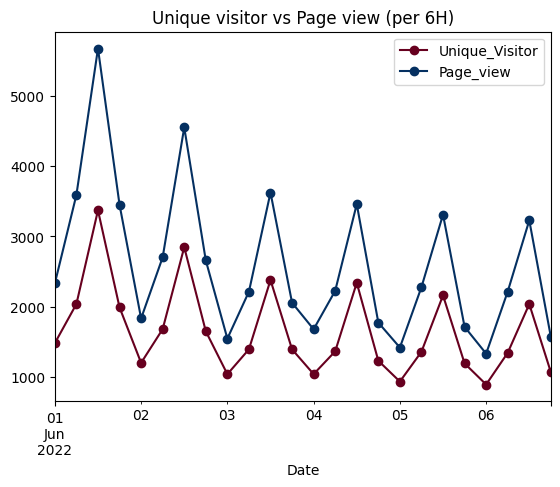

In [140]:
# 코드 13-47. 6시간마다 순 방문자 수와 페이지 뷰를 집계한 결과 시각화
title1 = 'Unique visitor vs Page view (per 6H)'
(df_ec.resample('6H')
 .agg(Unique_Visitor=('Ucode', 'nunique'), Page_view=('Action', 'count'))
 .plot(marker='o', colormap='RdBu', title=title1,)
)

In [141]:
# 코드 13-48. 6시간마다 각 카테고리의 매출 금액 집계하기
cond = df_ec['Action'] == 'B'
df_ec[cond].groupby('Category').resample('6H')['Price'].sum().unstack(0)

Category,Car,Computer,Fashion,Food
Date,,,,
2022-06-01 00:00:00,96.67,250.18,NaN,4062.26
2022-06-01 06:00:00,375.46,1498.62,279.78,3684.50
2022-06-01 12:00:00,238.59,178.87,955.11,4459.44
...,...,...,...,...
2022-06-06 06:00:00,1055.11,128.68,55.86,245.29
2022-06-06 12:00:00,213.10,421.35,334.49,1365.58
2022-06-06 18:00:00,NaN,249.96,NaN,967.18


<Axes: title={'center': 'Sales Amount by Category ($ / 6H)'}, xlabel='Date'>

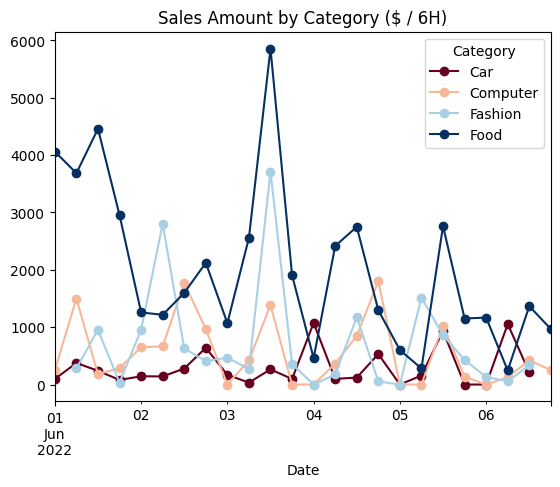

In [142]:
# 코드 13-49. 6시간마다 각 카테고리의 매출 금액 집계 시각화
title2 = 'Sales Amount by Category ($ / 6H)'
(df_ec[cond]
 .groupby('Category')
 .resample('6H')['Price'].sum().unstack(0)
.plot(marker='o', colormap='RdBu', title=title2)
)

array([[<Axes: xlabel='Date'>, <Axes: xlabel='Date'>],
       [<Axes: xlabel='Date'>, <Axes: xlabel='Date'>]], dtype=object)

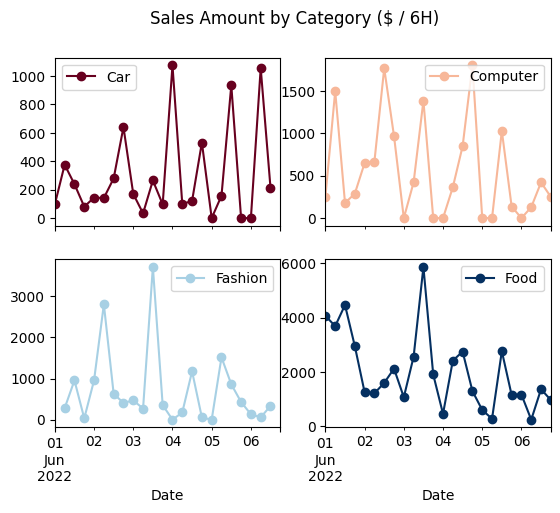

In [143]:
# 코드 13-50. 6시간마다 각 카테고리의 매출 금액 집계 시각화(subplot)
(df_ec[cond]
 .groupby('Category')
 .resample('6H')['Price'].sum().unstack(0)
.plot(marker='o', colormap='RdBu', title=title2, subplots=True, layout=(2, 2))
)

### 13.5. 특정 시계열 데이터 추출

#### 13.5.1. 특정 시계열 데이터 추출하는 다양한 메서드(dt 접근자)

In [144]:
# 코드 13-51. 다양한 시계열 데이터 추출 실습 예제 코드
import pandas as pd
idx = pd.date_range('2023-11-03', periods=6, freq='43D 9H 10T 13S')
s1 = pd.Series(idx)
s2 = pd.Series([10, 20, 30, 40, 50, 60], index=idx)
s1

,0
0,2023-11-03 00:00:00
1,2023-12-16 09:10:13
2,2024-01-28 18:20:26
3,2024-03-12 03:30:39
4,2024-04-24 12:40:52
5,2024-06-06 21:51:05


In [145]:
# 코드 13-52. 시계열 시리즈 s1에서 다양한 시계열 데이터 추출 실습
s1.dt.year # 연도
s1.dt.quarter # 분기
s1.dt.month # 월
s1.dt.day # 일
s1.dt.hour # 시각
s1.dt.minute # 분
s1.dt.second # 초

,0
0,0
1,13
2,26
3,39
4,52
5,5


In [146]:
# 코드 13-53. 시간을 제외하고 날짜만 출력하기
s1.dt.normalize()

,0
0,2023-11-03
1,2023-12-16
2,2024-01-28
3,2024-03-12
4,2024-04-24
5,2024-06-06


In [147]:
# 코드 13-54. DatetimeIndex에서 다양한 시계열 데이터 추출 실습
s2.index.year # 연도
s2.index.quarter # 분기
s2.index.month # 월
s2.index.day # 일
s2.index.hour # 시각
s2.index.minute # 분
s2.index.second # 초

Index([0, 13, 26, 39, 52, 5], dtype='int32')

#### 13.5.2. 문자열로 변환하기(strftime)

In [148]:
# 코드 13-55. datetime을 '%m/%d/%y' 형식의 문자열로 변환
s1.dt.strftime('%m/%d/%y')

,0
0,11/03/23
1,12/16/23
2,01/28/24
3,03/12/24
4,04/24/24
5,06/06/24


In [149]:
# 코드 13-56. datetime을 '%Y/%m' 형식의 문자열로 변환
s1.dt.strftime('%Y/%m')

,0
0,2023/11
1,2023/12
2,2024/01
3,2024/03
4,2024/04
5,2024/06


#### 13.5.3. period 자료형으로 변환하기(to_period)

In [150]:
# 코드 13-57. 분기별로 집계한 뒤, 인덱스를 PeriodIndex로 변환
tmp = s2.resample('Q').sum()
tmp.set_axis(tmp.index.to_period('Q'))

,0
2023Q4,30
2024Q1,70
2024Q2,110


### 엑셀 예제 23. 시계열 데이터가 포함된 온라인 쇼핑몰 데이터 다루기 (3)

In [151]:
# 엑셀 예제 21의 온라인 쇼핑몰 데이터 다시 불러오기(코드 13-14와 동일)
import pandas as pd
pd.options.display.max_rows = 6 # 6행까지만 출력
url1 = 'https://github.com/panda-kim/book1/blob/main/22ecomerce.xlsx?raw=true'
df_ec = pd.read_excel(url1, parse_dates=['Date'], index_col='Date')
df_ec

,Ucode,Category,Pcode,Price,Action
Date,,,,,
2022-06-01 00:00:01,u514028527,Fashion,p13071150,411.59,V
2022-06-01 00:00:13,u550193582,Car,p12705151,51.22,C
2022-06-01 00:00:19,u542985695,Food,p12705928,139.58,B
...,...,...,...,...,...
2022-06-06 23:59:29,u534987603,Food,p71018150,115.81,V
2022-06-06 23:59:43,u553673695,Food,p30400010,584.75,V
2022-06-06 23:59:50,u524946851,Food,p54900011,64.35,V


In [152]:
# 코드 13-58. 시각의 데이터를 hour 열로 생성
df_ec['hour'] = df_ec.index.hour
df_ec

,Ucode,Category,Pcode,Price,Action,hour
Date,,,,,,
2022-06-01 00:00:01,u514028527,Fashion,p13071150,411.59,V,0
2022-06-01 00:00:13,u550193582,Car,p12705151,51.22,C,0
2022-06-01 00:00:19,u542985695,Food,p12705928,139.58,B,0
...,...,...,...,...,...,...
2022-06-06 23:59:29,u534987603,Food,p71018150,115.81,V,23
2022-06-06 23:59:43,u553673695,Food,p30400010,584.75,V,23
2022-06-06 23:59:50,u524946851,Food,p54900011,64.35,V,23


In [153]:
# 코드 13-59. 6일간의 데이터를 시각으로 그룹을 나눠 페이지 뷰 구하기
df_ec.groupby('hour')['Action'].count()

,Action
hour,
0,1036
1,988
2,1810
...,...
21,1507
22,1486
23,1460


<Axes: title={'center': 'Distribution of page views by hour'}, xlabel='hour'>

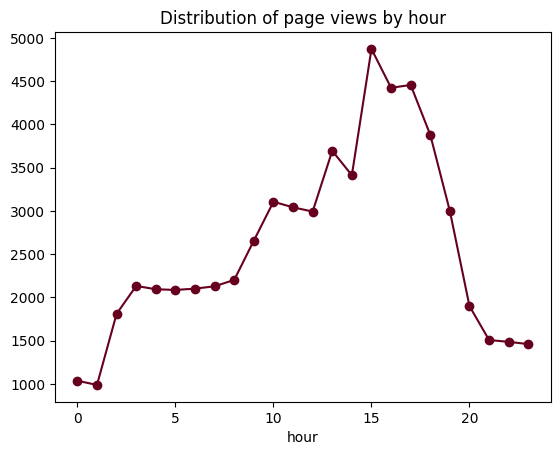

In [154]:
# 코드 13-60. 코드 13-59의 결과를 시각화
title3 = 'Distribution of page views by hour'
(df_ec
 .groupby('hour')['Action'].count()
 .plot(marker='o', colormap='RdBu', title=title3)
)

### 13.6. 그 외 시계열 데이터를 다루는 함수들

#### 13.6.1. 시간대 변환

In [155]:
# 실습을 위해 코드 13-51 다시 실행하기
import pandas as pd
idx = pd.date_range('2023-11-03', periods=6, freq='43D 9H 10T 13S')
s1 = pd.Series(idx)
s2 = pd.Series([10, 20, 30, 40, 50, 60], index=idx)
s1

,0
0,2023-11-03 00:00:00
1,2023-12-16 09:10:13
2,2024-01-28 18:20:26
3,2024-03-12 03:30:39
4,2024-04-24 12:40:52
5,2024-06-06 21:51:05


In [156]:
# 코드 13-61. 시간대 지정하기('Asia/Seoul')
s1.dt.tz_localize('Asia/Seoul')

,0
0,2023-11-03 00:00:00+09:00
1,2023-12-16 09:10:13+09:00
2,2024-01-28 18:20:26+09:00
3,2024-03-12 03:30:39+09:00
4,2024-04-24 12:40:52+09:00
5,2024-06-06 21:51:05+09:00


In [157]:
# 코드 13-62. 시간대를 지정하고 동부 표준시(EST)로 변환하기
s1.dt.tz_localize('Asia/Seoul').dt.tz_convert('EST')

,0
0,2023-11-02 10:00:00-05:00
1,2023-12-15 19:10:13-05:00
2,2024-01-28 04:20:26-05:00
3,2024-03-11 13:30:39-05:00
4,2024-04-23 22:40:52-05:00
5,2024-06-06 07:51:05-05:00


#### 13.6.2. 시간 간격 생성하기(DateOffset)

In [158]:
# 코드 13-63. 자료형을 그대로 두고 14시간의 시차만 조정하기
s1 - pd.Timedelta('14h')

,0
0,2023-11-02 10:00:00
1,2023-12-15 19:10:13
2,2024-01-28 04:20:26
3,2024-03-11 13:30:39
4,2024-04-23 22:40:52
5,2024-06-06 07:51:05


In [159]:
# 코드 13-64. 3개월 후의 datetime으로 변환하기
s1 + pd.DateOffset(months=3)

,0
0,2024-02-03 00:00:00
1,2024-03-16 09:10:13
2,2024-04-28 18:20:26
3,2024-06-12 03:30:39
4,2024-07-24 12:40:52
5,2024-09-06 21:51:05


In [160]:
# 코드 13-65. 코드 13-64의 매개변를 months가 아니라 month로 입력한 결과
s1 + pd.DateOffset(month=3)

<ipython-input-160-f335a74c829a>:2: PerformanceWarning: Non-vectorized DateOffset being applied to Series or DatetimeIndex.
  s1 + pd.DateOffset(month=3)


,0
0,2023-03-03 00:00:00
1,2023-03-16 09:10:13
2,2024-03-28 18:20:26
3,2024-03-12 03:30:39
4,2024-03-24 12:40:52
5,2024-03-06 21:51:05


#### 13.6.3. 시계열 그루퍼 생성하기(Grouper)

In [161]:
# 실습을 위해 코드 13-43 다시 실행하기
import pandas as pd
date = pd.date_range('2024-01-30 19:00', periods=6, freq='9h')
data1 = {'날짜': date,
         '제품': ['A', 'B', 'A', 'A', 'B', 'A'],
         '매출': [10000, 20000, 30000, 40000, 50000, 60000]}
df1 = pd.DataFrame(data1)
df1

,날짜,제품,매출
0,2024-01-30 19:00:00,A,10000
1,2024-01-31 04:00:00,B,20000
2,2024-01-31 13:00:00,A,30000
3,2024-01-31 22:00:00,A,40000
4,2024-02-01 07:00:00,B,50000
5,2024-02-01 16:00:00,A,60000


In [162]:
# 코드 13-66. Grouper 함수를 이용해 시계열 그루퍼를 생성해 집계하기
df1.groupby(['제품', pd.Grouper(key='날짜', freq='D')])['매출'].sum()

제품  날짜        
A   2024-01-30    10000
    2024-01-31    70000
    2024-02-01    60000
B   2024-01-31    20000
    2024-02-01    50000
Name: 매출, dtype: int64

In [163]:
# 코드 13-66의 결과와 groupby와 resample를 사용한 결과를 비교
df1.groupby('제품').resample(rule='D', on='날짜')['매출'].sum()

제품  날짜        
A   2024-01-30    10000
    2024-01-31    70000
    2024-02-01    60000
B   2024-01-31    20000
    2024-02-01    50000
Name: 매출, dtype: int64

In [164]:
# 코드 13-67. Grouper 함수로 시계열과 일반 열을 동시에 그룹화해 열 가공하기
df1.groupby(['제품', pd.Grouper(key='날짜', freq='D')])['매출'].cumsum()

,매출
0,10000
1,20000
2,30000
3,70000
4,50000
5,60000


#### 13.6.4. 영업일만 배열로 생성하기(bdate_range)

In [165]:
# 코드 13-68. 2024-08-09부터 8개의 영업일을 배열로 생성(date_range)
pd.date_range('2024-08-09', periods=8, freq='B')

DatetimeIndex(['2024-08-09', '2024-08-12', '2024-08-13', '2024-08-14',
               '2024-08-15', '2024-08-16', '2024-08-19', '2024-08-20'],
              dtype='datetime64[ns]', freq='B')

In [166]:
# 코드 13-69. 2024-08-09부터 광복절을 제외한 8개의 영업일을 배열로 생성
holidays = ['2024-08-15']
pd.bdate_range('2024-08-09', periods=8, freq='C', holidays=holidays)

DatetimeIndex(['2024-08-09', '2024-08-12', '2024-08-13', '2024-08-14',
               '2024-08-16', '2024-08-19', '2024-08-20', '2024-08-21'],
              dtype='datetime64[ns]', freq='C')

In [167]:
# 코드 13-70. 2024-08-09부터 토요일을 포함한 8개의 영업일을 배열로 생성
weekmask = 'Mon Tue Wed Thu Fri Sat'
holidays = ['2023-08-15']
pd.bdate_range(
    '2023-08-09', periods=8, freq='C', holidays=holidays, weekmask=weekmask
)

DatetimeIndex(['2023-08-09', '2023-08-10', '2023-08-11', '2023-08-12',
               '2023-08-14', '2023-08-16', '2023-08-17', '2023-08-18'],
              dtype='datetime64[ns]', freq='C')

#### 13.6.5. 업샘플링(asfreq 외)

In [168]:
# 코드 13-71. 업샘플링 실습 예제 코드
import pandas as pd
idx1 = pd.to_datetime(['2024-08-14 09', '2024-08-14 11', '2024-08-19 09'])
idx2 = pd.to_datetime(['2024-08-14', '2024-08-16', '2024-08-19'])
s1 = pd.Series([10, 20, 50], index=idx1)
s2 = pd.Series([10, 20, 50], index=idx2)
s1

,0
2024-08-14 09:00:00,10
2024-08-14 11:00:00,20
2024-08-19 09:00:00,50


In [169]:
# 코드 13-72. 일자별 구매량 집계하기
s1.resample('D').sum()

,0
2024-08-14,30
2024-08-15,0
2024-08-16,0
2024-08-17,0
2024-08-18,0
2024-08-19,50


In [170]:
# 코드 13-73. 일자별 구매량의 누적 합으로 일자별 보유량 구하기
s1.resample('D').sum().cumsum()

,0
2024-08-14,30
2024-08-15,30
2024-08-16,30
2024-08-17,30
2024-08-18,30
2024-08-19,80


In [171]:
# 코드 13-74. 코드 13-72에서 데이터가 없는 구간은 NaN을 생성하기
s1.resample('D').sum(min_count=1)

,0
2024-08-14,30.0
2024-08-15,NaN
2024-08-16,NaN
2024-08-17,NaN
2024-08-18,NaN
2024-08-19,50.0


In [172]:
# 코드 13-75. asfreq 함수로 업샘플링 수행
s2.asfreq('D')

,0
2024-08-14,10.0
2024-08-15,NaN
2024-08-16,20.0
2024-08-17,NaN
2024-08-18,NaN
2024-08-19,50.0


In [173]:
# 코드 13-76. 일자별 구매량의 누적 합으로 일자별 보유량 구하기
s2.asfreq('D', fill_value=0).cumsum()

,0
2024-08-14,10
2024-08-15,10
2024-08-16,30
2024-08-17,30
2024-08-18,30
2024-08-19,80


In [174]:
# 코드 13-77. 2일 간격으로 데이터 필터링
s2.asfreq('2D')

,0
2024-08-14,10.0
2024-08-16,20.0
2024-08-18,NaN


In [175]:
# 코드 13-78. 생성한 시계열 배열과 reindex 함수로 업샘플링 수행
holidays = ['2024-08-15']
date = pd.bdate_range(
    '2024-08-13', end='2024-08-21', freq='C', holidays=holidays
)
s2.reindex(date)

,0
2024-08-13,NaN
2024-08-14,10.0
2024-08-16,20.0
2024-08-19,50.0
2024-08-20,NaN
2024-08-21,NaN


In [176]:
# 코드 13-79. 일자별 구매량의 누적 합으로 일자별 보유량 구하기
s2.reindex(date, fill_value=0).cumsum()

,0
2024-08-13,0
2024-08-14,10
2024-08-16,30
2024-08-19,80
2024-08-20,80
2024-08-21,80


### 엑셀 예제 24. 비트 코인 구매일지의 업샘플링 수행하기

In [177]:
# 코드 13-80. 비트코인 구매 일지 엑셀 파일에서 데이터 프레임 불러오기
import pandas as pd
pd.options.display.max_rows = 6 # 6행까지만 출력
url2 = 'https://github.com/panda-kim/book1/blob/main/23btc.xlsx?raw=true'
df_coin = pd.read_excel(url2, index_col='Date', parse_dates=['Date'])
df_coin

,Symbol,Price,Buy/Sell,Amount,Quantity
Date,,,,,
2020-12-28 17:16:00,BTC/KRW,29600000,Buy,100000,0.003378
2021-01-05 15:13:00,BTC/KRW,34500000,Buy,50000,0.001449
2021-01-12 01:18:00,BTC/KRW,35200000,Buy,50000,0.001420
...,...,...,...,...,...
2023-10-08 19:44:00,BTC/KRW,37850000,Buy,378500,0.010000
2023-10-09 18:50:00,BTC/KRW,37500000,Buy,375000,0.010000
2023-10-11 11:32:00,BTC/KRW,37200000,Buy,372000,0.010000


In [178]:
# 코드 13-81. 일자별 구매 금액과 구매량을 집계 후, 2024-03-04일까지 업샘플링
tmp = df_coin.resample('D')[['Amount', 'Quantity']].sum()
date = pd.date_range('2020-12-28', '2024-03-04')
tmp = tmp.reindex(date,fill_value=0)
tmp

,Amount,Quantity
2020-12-28,100000,0.003378
2020-12-29,0,0.000000
2020-12-30,0,0.000000
...,...,...
2024-03-02,0,0.000000
2024-03-03,0,0.000000
2024-03-04,0,0.000000


In [179]:
# 코드 13-82. 누적 구매 금액과 누적 구매량 구하기(add_prefix로 열 이름 변환)
tmp.cumsum().add_prefix('Cum ')

,Cum Amount,Cum Quantity
2020-12-28,100000,0.003378
2020-12-29,100000,0.003378
2020-12-30,100000,0.003378
...,...,...
2024-03-02,228047871,7.495755
2024-03-03,228047871,7.495755
2024-03-04,228047871,7.495755


In [180]:
# 코드 13-83. 엑셀 파일의 두 번째 시트 불러와 2020-12-28 이후의 자료만 인덱싱
df_btc = pd.read_excel(
    url2, sheet_name=1, index_col='Date', parse_dates=['Date']
).loc['2020-12-28':]
df_btc

,BTC Close
Date,
2020-12-28,30249000
2020-12-29,30498000
2020-12-30,31891000
...,...
2024-03-02,86383000
2024-03-03,87982000
2024-03-04,88616000


In [181]:
# 코드 13-84. tmp와 tmp의 누적 합과 비트코인 가격을 가로 방향으로 연결하기
out = pd.concat([tmp, tmp.cumsum().add_prefix('Cum '), df_btc], axis=1)
out

,Amount,Quantity,Cum Amount,Cum Quantity,BTC Close
2020-12-28,100000,0.003378,100000,0.003378,30249000
2020-12-29,0,0.000000,100000,0.003378,30498000
2020-12-30,0,0.000000,100000,0.003378,31891000
...,...,...,...,...,...
2024-03-02,0,0.000000,228047871,7.495755,86383000
2024-03-03,0,0.000000,228047871,7.495755,87982000
2024-03-04,0,0.000000,228047871,7.495755,88616000


In [182]:
# 코드 13-85. 변수 out에 분석에 필요한 열 생성하기
# WACB(평균 매수 단가) 열 생성하기
out['WACB'] = out['Cum Amount'] / out['Cum Quantity']

# Profit(순수익) 열 생성하기
out['Profit'] = out['Cum Quantity'] * out['BTC Close'] - out['Cum Amount']

# ROI(%)(수익률) 열 생성하기
out['ROI(%)'] = (out['Profit'] / out['Cum Amount']) * 100
out

,Amount,Quantity,Cum Amount,Cum Quantity,BTC Close,WACB,Profit,ROI(%)
2020-12-28,100000,0.003378,100000,0.003378,30249000,2.959999e+07,2.192617e+03,2.192617
2020-12-29,0,0.000000,100000,0.003378,30498000,2.959999e+07,3.033833e+03,3.033833
2020-12-30,0,0.000000,100000,0.003378,31891000,2.959999e+07,7.739917e+03,7.739917
...,...,...,...,...,...,...,...,...
2024-03-02,0,0.000000,228047871,7.495755,86383000,3.042360e+07,4.194579e+08,183.934150
2024-03-03,0,0.000000,228047871,7.495755,87982000,3.042360e+07,4.314436e+08,189.189938
2024-03-04,0,0.000000,228047871,7.495755,88616000,3.042360e+07,4.361959e+08,191.273846


<Axes: ylabel='Quantity (BTC)'>

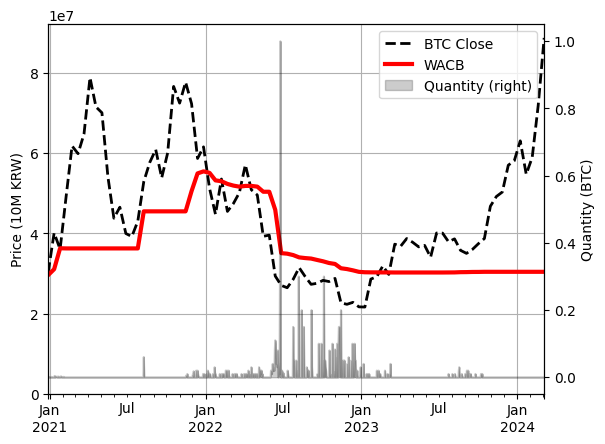

In [183]:
# 코드 13-86. 비트 코인 가격과 평균 매수 단가 시각화
# 비트코인 가격을 14일 주기로 추출해 시각화
(out['BTC Close']
 .asfreq('14D')
 .plot(color='black', grid=True, lw=2, ls='--', legend=True)
)

# 평균 매수단가(WACB)를 14일 주기로 추출해 시각화
(out['WACB']
 .asfreq('14D')
 .plot(color='red', grid=True, lw=3, ylabel='Price (10M KRW)', legend=True)
)

# 일자별 매수량의 면적그래프를 이중 y축(secondary_y)으로 생성
out['Quantity'].plot(
    kind='area', color='black', alpha=0.2, secondary_y=True,
    legend=True, ylabel='Quantity (BTC)'
)

<Axes: ylabel='Profit (100M KRW)'>

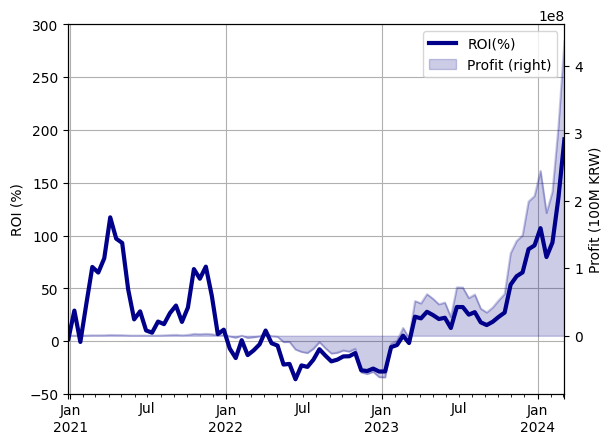

In [184]:
# 코드 13-87. 수익률과 누적 수익 시각화
# 수익률(ROI(%)) 시각화
(out['ROI(%)']
 .asfreq('14D')
 .plot(color='darkblue', legend=True, grid=True,
       lw=3, ylabel=('ROI (%)'), ylim=(-50, 300))
)

# 순수익의 면적그래프를 이중 y축(secondary_y)으로 생성
(out['Profit']
 .asfreq('14D')
 .plot(kind='area', stacked=False, alpha=0.2, color='darkblue',
       secondary_y=True, legend=True, ylabel='Profit (100M KRW)')
)